# Read data path and check files

In [1]:
train_data_path = "car_data/train/"
test_data_path = "car_data/test/"
valid_data_path = "car_data/valid/"

In [2]:
print(train_data_path)

car_data/train/


In [3]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from skimage import io
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt

size of image (h x w) 640 640


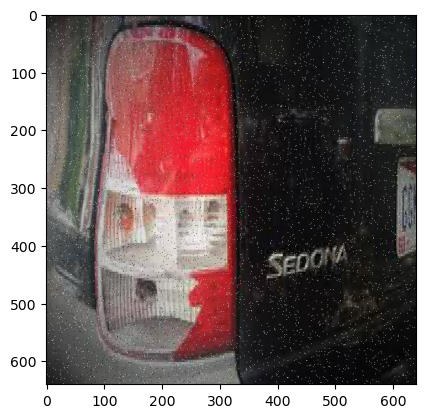

In [4]:
img = plt.imread(os.path.join(train_data_path, "sign_light--19-_jpg.rf.9170ffdd1abc3028910d4592a6aa9984.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

# Data Preprocessing

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
# import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


# Removing duplicate images

In [6]:
def remove_duplicates(directory):
    seen_images = set()
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Check if the path points to a file
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                image_hash = hash(f.read())
                if image_hash in seen_images:
                    os.remove(file_path)
                else:
                    seen_images.add(image_hash)

# Apply to train, test, and valid directories
remove_duplicates(train_data_path)
remove_duplicates(test_data_path)
remove_duplicates(valid_data_path)

# Handling Missing or corrupted images


In [7]:
def remove_invalid_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            # Skip non-image files
            if not is_valid_image(file_path):
                continue

            img = io.imread(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            os.remove(file_path)

# Function to check if a file is a valid image
def is_valid_image(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

# Apply to train, test, and valid directories
remove_invalid_images(train_data_path)
remove_invalid_images(test_data_path)
remove_invalid_images(valid_data_path)

# Loading Images

In [8]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50

train_dataset = train.flow_from_directory(directory = 'car_data/',classes = ['train']
                                         ,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

test_dataset = test.flow_from_directory(directory = 'car_data/',classes = ['test']
                                       ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

valid_dataset = test.flow_from_directory(directory = 'car_data/',classes = ['valid']
                                        ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary',
        shuffle=True)

Found 3356 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 390 images belonging to 1 classes.
